<a href="https://colab.research.google.com/github/cdrowley/ds-notes/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyOD

In [1]:
!pip install pyod --q

     |████████████████████████████████| 118 kB 5.0 MB/s 


In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


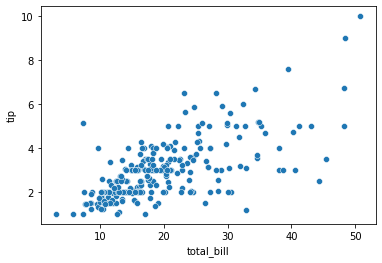

In [3]:
sns.scatterplot(data=df, x='total_bill', y='tip');

In [4]:
from pyod.models.abod import ABOD

outlier_fraction = 0.05
abod_clf = ABOD(contamination=outlier_fraction)
abod_clf.fit(df[['total_bill', 'tip']])

# returns classified in/outliers (decision score or probability can also be accessed  )
abod_clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [5]:
from pyod.models.cblof import CBLOF

outlier_fraction = 0.05
cblof_clf = CBLOF(contamination=outlier_fraction, check_estimator=False, random_state=42)
cblof_clf.fit(df[['total_bill', 'tip']])

abod_clf.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [6]:
df['abod_clf'] = abod_clf.labels_
df['cblof_clf'] = cblof_clf.labels_

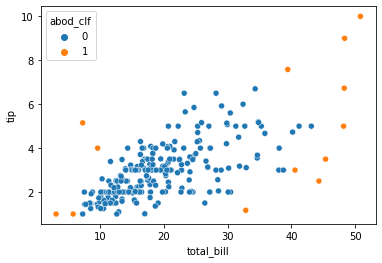

In [7]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='abod_clf');

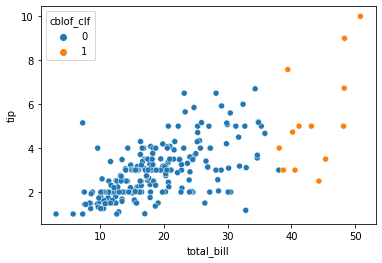

In [8]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='cblof_clf');

### PyNomaly

In [9]:
!pip install PyNomaly -q

In [11]:
# https://towardsdatascience.com/novelty-detection-with-local-outlier-factor-4867e89e4f91

from PyNomaly import loop

m = loop.LocalOutlierProbability(df[['total_bill', 'tip']], use_numba=True, progress_bar=True).fit()
scores = m.local_outlier_probabilities

[ ================================================================================== ] 100.00%

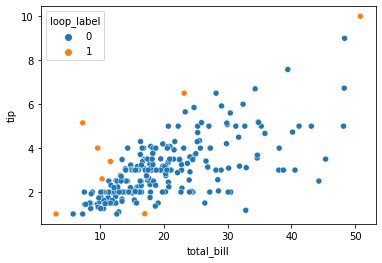

In [12]:
df['loop_score'] = scores
df['loop_label'] = df['loop_score'].apply(lambda x: 1 if x >0.5 else 0)
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'loop_label');